### 2.Problem Statement

In this assignment students will build the random forest model after normalizing the
variable to house pricing from boston data set.<br>
Following the code to get data into the environment:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [19]:
x = features
y = targets
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error

In [68]:
## Model building without scaling
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.3, random_state=1)


In [41]:
model1 = RandomForestRegressor()
seed=2
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model1, x_train,y_train, cv=kfold)
print('The Accuarcy on train data:',results.mean())

The Accuarcy on train data: 0.8289851793879011


In [35]:
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
score= mean_squared_error(y_test,pred)
print('Te RMSE on test data is:',np.sqrt(score.mean()))

Te RMSE on test data is: 3.0106104032239043


In [52]:
params = {'n_estimators':100, 
          'criterion':'mse', 
          'max_depth':3, 
          'min_samples_split':6, 
          'min_samples_leaf':4, 
          'min_weight_fraction_leaf':0.0, 
          'max_features':'auto', 
          'max_leaf_nodes':None, 
          'min_impurity_decrease':0.0, 
          'min_impurity_split':None,
          'bootstrap':True, 
          'oob_score':False, 
          'n_jobs':1, 
          'random_state':3, 
          'verbose':0,
          'warm_start':False}

In [54]:
model2 = RandomForestRegressor(**params)
seed=2
kfold = KFold(n_splits=8, random_state=seed)
results = cross_val_score(model2, x_train,y_train, cv=kfold)
print('The accuracy on train data:',results.mean())

The accuracy on train data: 0.7575878755348552


In [59]:
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
score= mean_squared_error(y_test,pred)
print('Te RMSE on test data is:',np.sqrt(score.mean()))

Te RMSE on test data is: 3.8436143879467233


#### Using StandardScaler

In [69]:

stdsc = StandardScaler()
x_scaled_train = stdsc.fit_transform(x_train)
x_scaled_test = stdsc.fit_transform(x_test)
# y_scaled = stdsc.fit_transform(y)

In [70]:
# Feature Importnace
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': model2.feature_importances_})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

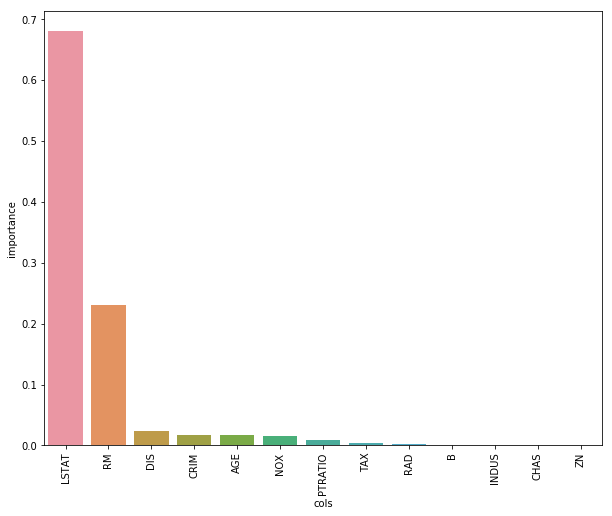

In [73]:
importance = importance.sort_values(by='importance', ascending=False)
%matplotlib inline
plt.figure(figsize=(10,8))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [60]:
# RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [107]:
params = {'n_estimators':sp_randint(1,500),  
          'max_depth':sp_randint(1,8), 
          'min_samples_split':sp_randint(1,6), 
          'min_samples_leaf':sp_randint(1,6)} 
            
          

In [108]:
model3 = RandomForestRegressor()
rscv = RandomizedSearchCV(model3, param_distributions=params, n_iter=10, verbose=1)

In [109]:
rscv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   24.4s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000B2BC4E0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000B2BCCF8>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000B2BCEB8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000B2BC5C0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_

In [111]:
rscv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 465}

In [113]:
params = {'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 465}

In [116]:
model3 = RandomForestRegressor(**params)
model3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=465, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [117]:
pred = model3.predict(x_test)
score= mean_squared_error(y_test,pred)
print('Te RMSE on test data is:',np.sqrt(score.mean()))

Te RMSE on test data is: 3.1092991820714095
